# E-tivity 3: : Linear Regression

## Student Name: Garret Molloy
## Student ID: 9021906

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split

# Task 4  (CE6002)
- Copy your linear classification algorithm to the notebook Etivity3_LinearRegression.ipynb available in the git repository. Change your linear classification algorithm to make it suitable for linear regression. Use this to obtain the best possible fit to the data set Task4.csv. Your regression performance should improve if you add some new features.
- Also, use an algorithm from the scikit-learn toolbox to see if you can do better. You should not add any other imports than those necessary for your chosen scikit-learn algorithm.


In [7]:
# Read in data file
df = pd.read_csv('Task4.csv')

In [9]:
df.shape

(100, 2)

In [11]:
df.head()

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927


In [24]:
X = np.array(df['X'].values, dtype=float)
y = np.array(df['y'].values, dtype=float)

In [26]:
X[2]

0.0202

In [27]:
y[2]

-0.0937

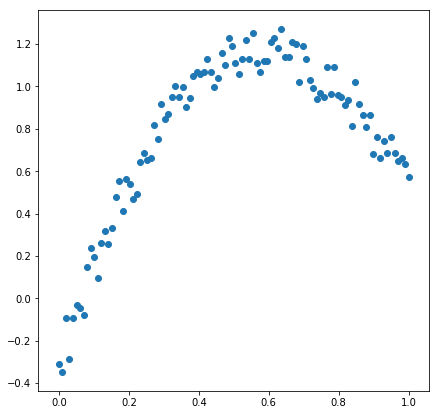

In [15]:
fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [16]:
def linear_classification(x,w):
    #Linear Classificaion is the sign of the dot product of weights(transposed) and input vector eights
    # its sgn determines the class allocation
    return np.sign(w.T.dot(x))

In [ ]:
# Changing Classificaiton to Regression Predict Value
def linear_regression_predict(x,w):
    #Linear Classificaion is the sign of the dot product of weights(transposed) and input vector eights
    # its sgn determines the class allocation
    return (w.T.dot(x))

In [17]:
# Homemade Linear Regression from scratch (didn't think I could do it!!
from numpy.linalg import inv

def linear_regression(X, y):
    # X dagger = Psuedo Inverse =        (Xt * X)^-1 * Xt
    psuedo_inverse = np.matmul(inv(np.matmul(X.T, X)), X.T)    # Yaay! one line!!
    # return w = X dagger * Xt
    return np.matmul(psuedo_inverse, y) # return w

In [31]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [35]:
# Add Bias to input features
shape = X.shape
new_X = np.ones((shape[0],2))
new_X[:,1] = X

In [36]:
# Split the data in to train and test (80/20 split) and ensure the data is shuffled.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2, shuffle=True)

In [37]:
X_train.shape

(80, 2)

In [38]:
X_test.shape

(20, 2)

In [40]:
weights = linear_regression(X_train, y_train)

In [42]:
x_min = min(X_train[:,1])
x_max = max(X_train[:,1])
y_min,y_max = decision_boundary(weights, x_min, x_max)

fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X_train[:,1],y_train)
plt.plot([x_min, x_max], [y_min, y_max])
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2